# Análisis de `PR_Advisory_Tweets_Feb_2025.csv`

Este cuaderno presenta un análisis estructurado de los datos de Twitter relacionados con la alerta de tsunami de Puerto Rico en febrero de 2025. Incluye:

- **Carga y preprocesamiento de datos**.
- **Análisis de datos e ingeniería de características**.
- **Análisis exploratorio de datos (EDA)**
- **Visualizaciones** utilizando bibliotecas como Pandas, Matplotlib, Seaborn, Plotly, PyWaffle y WordCloud.

El objetivo es extraer información significativa del contenido de los tweets y de los patrones de participación, prestando atención al uso del lenguaje, las tendencias temporales y las características textuales. Este cuaderno sirve tanto de informe analítico como de referencia para aplicar diversas herramientas de Python al análisis de las redes sociales.

## 1. Importar bibliotecas

Las siguientes bibliotecas se utilizarán a lo largo del cuaderno.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from pywaffle import Waffle
from wordcloud import WordCloud



## 2. Carga de datos

Cargar CSV en un DataFrame de Pandas.

In [2]:
# Cargar CSV con cabecera deducida
df = pd.read_csv('PR_Advisory_Tweets_Feb_2025.csv')

print("Datos cargados. Número de filas:", df.shape[0])
df.head()

Datos cargados. Número de filas: 122


,Query_Str,Post_URL,Author_Name,Author_Web_Page_URL,Author_Handle,Verified_Status,UTC_Time,Ads,Tweet_Content,Post_ID,...,Like_Count,View_Count,Bookmark_Count,Tweet_Image_URL,Replying_to,Reply_to_Whom,Reply_to_Whom_URL,Reply_to_Whom_Username,Reply_to_Whom_Handle,Language
0,Puerto Rico (tsunami OR sismo OR terremoto OR ...,https://x.com/search?q=Puerto Rico (tsunami OR...,sia ❄️ | fan,https://x.com/lalisalovemme,lalisalovemme,True,2025-02-07 00:08:19+00:00,False,THIS IS A 9.9 MAGNITUDE MOTHERSQUAKE!!!!\n\n#D...,1.887655e+18,...,4621,60693,66,https://pbs.twimg.com/ext_tw_video_thumb/18876...,False,NaN,NaN,NaN,NaN,en
1,Puerto Rico (tsunami OR sismo OR terremoto OR ...,https://x.com/search?q=Puerto Rico (tsunami OR...,Geól. Sergio Almazán,https://x.com/chematierra,chematierra,True,2025-02-07 14:07:39+00:00,False,AVISO 🔴\nEnjambre sísmico intenso cercano a #S...,1.887866e+18,...,221,8646,5,https://pbs.twimg.com/media/GjML8z7WEAAeZgK.jpg,False,NaN,NaN,NaN,NaN,es
2,Puerto Rico (tsunami OR sismo OR terremoto OR ...,https://x.com/search?q=Puerto Rico (tsunami OR...,Jack Straw,https://x.com/JackStr42679640,JackStr42679640,True,2025-02-07 11:43:05+00:00,False,🚨Guantanamo Bay Alert! (Watch till end)🚨\n \nT...,1.887829e+18,...,427,15428,46,https://pbs.twimg.com/ext_tw_video_thumb/18878...,False,NaN,NaN,NaN,NaN,en
3,Puerto Rico (tsunami OR sismo OR terremoto OR ...,https://x.com/search?q=Puerto Rico (tsunami OR...,Belen Larchens 💛🐾🐾,https://x.com/belenlarchens,belenlarchens,False,2025-02-07 23:07:14+00:00,False,El municipio de #ElBolsón informó : «se ordena...,1.888002e+18,...,467,9041,4,https://pbs.twimg.com/media/GjOHcENXoAAlZnc.jpg,False,NaN,NaN,NaN,NaN,es
4,Puerto Rico (tsunami OR sismo OR terremoto OR ...,https://x.com/search?q=Puerto Rico (tsunami OR...,SkyAlert,https://x.com/SkyAlertMx,SkyAlertMx,True,2025-02-07 02:43:14+00:00,False,#Sismo magnitud 4.0 (SSN) ubicado a 14 km al s...,1.887694e+18,...,229,15918,1,https://pbs.twimg.com/media/GjJvTPaXwAAxZCN.jp...,False,NaN,NaN,NaN,NaN,es


## 3. Exploración rápida

Inspeccionemos rápidamente los datos.

In [3]:
# Ver las primeras y últimas filas
print(df.head())
print(df.tail())

# Información resumida
df.info()
print(df.describe(include='all'))

# Comprobar si hay valores nulos
print(df.isnull().sum())

# Tipos de datos
print(df.dtypes)

                                           Query_Str  \
0  Puerto Rico (tsunami OR sismo OR terremoto OR ...   
1  Puerto Rico (tsunami OR sismo OR terremoto OR ...   
2  Puerto Rico (tsunami OR sismo OR terremoto OR ...   
3  Puerto Rico (tsunami OR sismo OR terremoto OR ...   
4  Puerto Rico (tsunami OR sismo OR terremoto OR ...   

                                            Post_URL           Author_Name  \
0  https://x.com/search?q=Puerto Rico (tsunami OR...          sia ❄️ | fan   
1  https://x.com/search?q=Puerto Rico (tsunami OR...  Geól. Sergio Almazán   
2  https://x.com/search?q=Puerto Rico (tsunami OR...            Jack Straw   
3  https://x.com/search?q=Puerto Rico (tsunami OR...    Belen Larchens 💛🐾🐾   
4  https://x.com/search?q=Puerto Rico (tsunami OR...              SkyAlert   

             Author_Web_Page_URL    Author_Handle  Verified_Status  \
0    https://x.com/lalisalovemme    lalisalovemme             True   
1      https://x.com/chematierra      chematierra     

## 4. Limpieza de datos e ingeniería de características

El conjunto de datos se preprocesó para conservar sólo los atributos más relevantes para el análisis. Se realizaron los siguientes pasos:

- Se eliminaron las columnas que sólo contenían valores perdidos.
- Se eliminaron los metadatos y los campos auxiliares no necesarios para el análisis, incluida la información sobre el autor, las URL de las imágenes y los objetivos de las respuestas.
- Se rellenaron los valores que faltaban en los campos relacionados con el compromiso (`Reply_Count`, `Repost_Count`, `Like_Count`, `Bookmark_Count`) y se convirtieron a tipo entero.
- Creamos una columna `Total_Engagement` sumando las métricas de compromiso individuales.
- Seleccionamos las características clave para el análisis: `Post_ID`, `Tweet_Content`, `Total_Engagement`, y `Language`.
- Se ha añadido una columna `Tweet_Length` para capturar el número de caracteres de cada tweet.

El resultado es un DataFrame simplificado adecuado para el análisis basado en el contenido, la participación y el idioma.



In [5]:
# Paso 1: Eliminar columnas que tienen solo valores nulos
df = pd.read_csv("PR_Advisory_Tweets_Feb_2025.csv")
df = df.dropna(axis=1, how='all')

# Paso 2: Eliminar columnas de metadatos innecesarias
drop_cols = [
    'Query_Str', 'Post_URL', 'Author_Name', 'Author_Web_Page_URL', 'Author_Handle',
    'Verified_Status', 'Tweet_URL', 'Tweet_Image_URL',
    'Replying_to', 'Reply_to_Whom', 'Reply_to_Whom_URL',
    'Reply_to_Whom_Username', 'Reply_to_Whom_Handle', 'Ads'
]
df = df.drop(columns=[col for col in drop_cols if col in df.columns])

# Paso 3: Rellenar y convertir las columnas de engagement
engagement_cols = ["Reply_Count", "Repost_Count", "Like_Count", "Bookmark_Count"]
for col in engagement_cols:
    df[col] = df[col].fillna(0).astype(int)

# Paso 4: Crear la columna Total_Engagement (suma de todas las interacciones)
df["Total_Engagement"] = df["Reply_Count"] + df["Repost_Count"] + df["Like_Count"] + df["Bookmark_Count"]

# Paso 5: Renombrar y convertir la columna de tiempo UTC para análisis temporal
df["Timestamp_UTC"] = pd.to_datetime(df["UTC_Time"])

# Paso 6: Seleccionar las columnas relevantes
df_selected = df[["Post_ID", "Tweet_Content", "Total_Engagement", "Language", "Timestamp_UTC"]].copy()

# Paso 7: Agregar columna de longitud del tweet
df_selected["Tweet_Length"] = df_selected["Tweet_Content"].str.len()

# Paso 8: Agregar columnas temporales para futuros análisis
df_selected["Hour"] = df_selected["Timestamp_UTC"].dt.hour
df_selected["Weekday"] = df_selected["Timestamp_UTC"].dt.day_name()
df_selected["Date"] = df_selected["Timestamp_UTC"].dt.date

# Paso 9: Agregar columna categórica de longitud del tweet usando intervalos
# Definir los rangos de longitud y etiquetas
length_bins = [0, 80, 140, 200, 280, df_selected["Tweet_Length"].max()]
length_labels = ["Very Short", "Short", "Medium", "Long", "Very Long"]

# Crear nueva columna categórica basada en la longitud del tweet
df_selected["Tweet_Length_Category"] = pd.cut(
    df_selected["Tweet_Length"],
    bins=length_bins,
    labels=length_labels,
    include_lowest=True
)

# Vista previa del DataFrame ya limpio
print("DataFrame limpio y transformado:")
df_selected.head()


DataFrame limpio y transformado:


,Post_ID,Tweet_Content,Total_Engagement,Language,Timestamp_UTC,Tweet_Length,Hour,Weekday,Date,Tweet_Length_Category
0,1.887655e+18,THIS IS A 9.9 MAGNITUDE MOTHERSQUAKE!!!!\n\n#D...,6214,en,2025-02-07 00:08:19+00:00,97,0,Friday,2025-02-07,Short
1,1.887866e+18,AVISO 🔴\nEnjambre sísmico intenso cercano a #S...,319,es,2025-02-07 14:07:39+00:00,303,14,Friday,2025-02-07,Very Long
2,1.887829e+18,🚨Guantanamo Bay Alert! (Watch till end)🚨\n \nT...,657,en,2025-02-07 11:43:05+00:00,302,11,Friday,2025-02-07,Very Long
3,1.888002e+18,El municipio de #ElBolsón informó : «se ordena...,1023,es,2025-02-07 23:07:14+00:00,300,23,Friday,2025-02-07,Very Long
4,1.887694e+18,#Sismo magnitud 4.0 (SSN) ubicado a 14 km al s...,255,es,2025-02-07 02:43:14+00:00,167,2,Friday,2025-02-07,Medium


## 5. Análisis y exploración de datos

### 🟦 SECCIÓN A: Análisis de la distribución

Estos gráficos muestran la forma y la distribución de las dos características numéricas principales:
- **Total_Engagement:** Cuánta atención recibieron los tweets.
- **Longitud_Tweet:** Número de caracteres de cada tweet.
- **Language:** Español o inglés

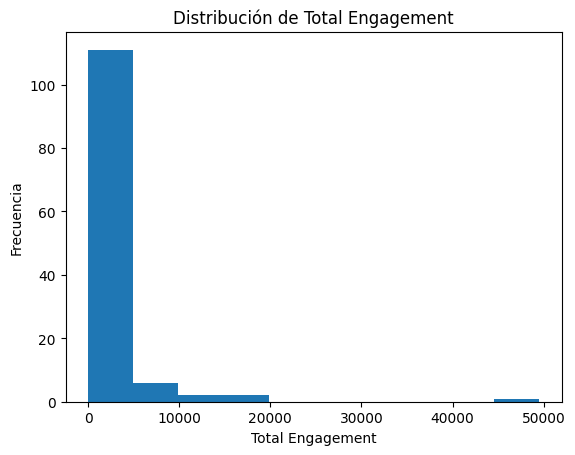

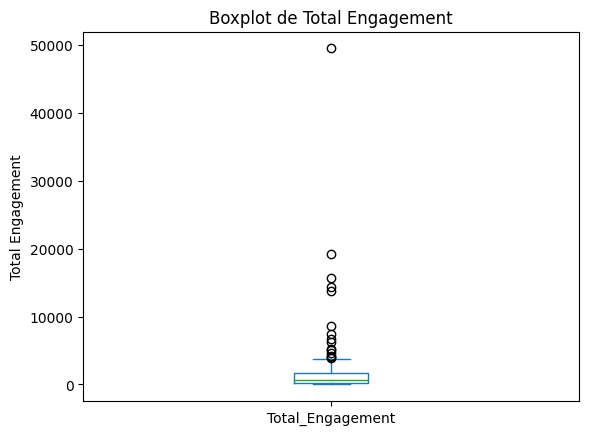

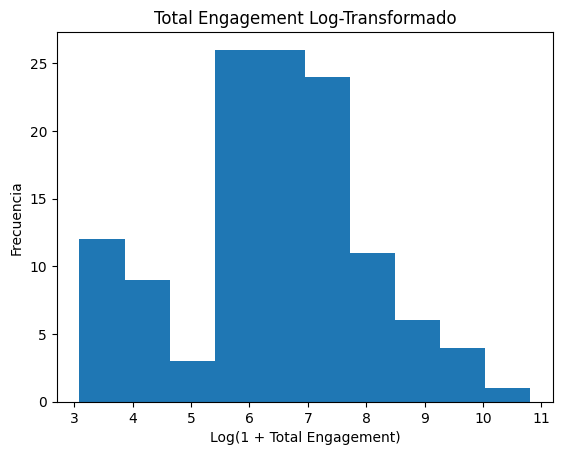

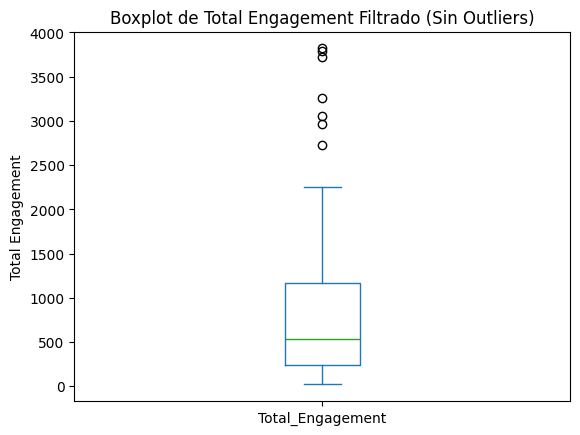

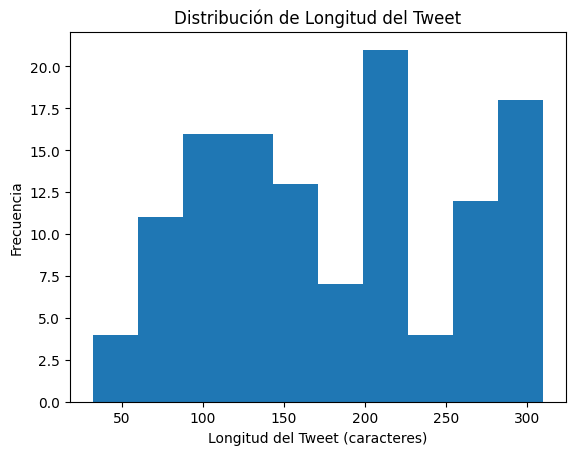

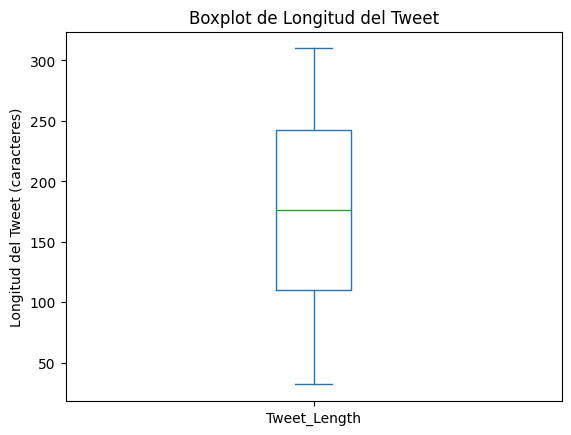

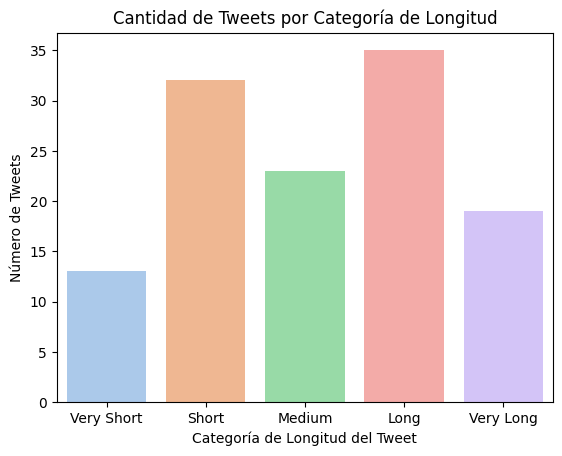

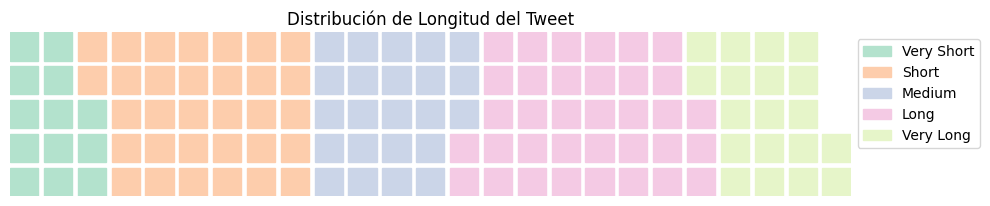

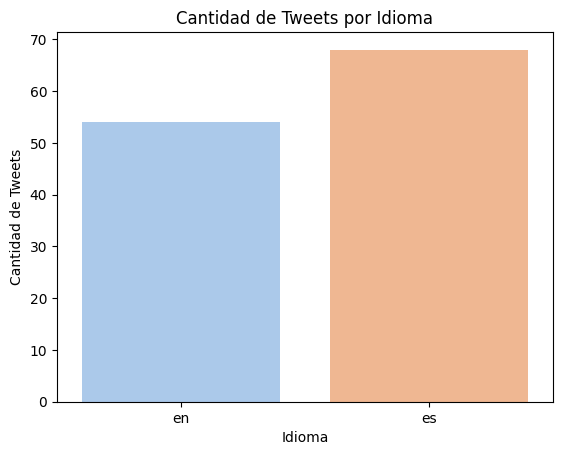

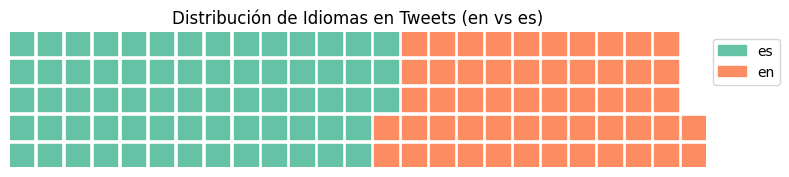

In [6]:
# ======================================================
# SECCIÓN A: DISTRIBUCIÓN DE TOTAL ENGAGEMENT E INSIGHTS
# ======================================================

# Histograma: Total Engagement bruto
df_selected["Total_Engagement"].plot(kind="hist", bins=10, title="Distribución de Total Engagement")
plt.xlabel("Total Engagement")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: Total Engagement bruto
df_selected["Total_Engagement"].plot(kind="box", title="Boxplot de Total Engagement")
plt.ylabel("Total Engagement")
plt.show()

# Transformación logarítmica de Total Engagement para mejor escala
df_selected["Log_Total_Engagement"] = np.log1p(df_selected["Total_Engagement"])  # log(1 + x)
df_selected["Log_Total_Engagement"].plot(kind="hist", bins=10, title="Total Engagement Log-Transformado")
plt.xlabel("Log(1 + Total Engagement)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: Total Engagement filtrado por IQR (eliminando outliers extremos)
Q1 = df_selected["Total_Engagement"].quantile(0.25)
Q3 = df_selected["Total_Engagement"].quantile(0.75)
IQR = Q3 - Q1
filtered_df = df_selected[
    (df_selected["Total_Engagement"] >= Q1 - 1.5 * IQR) &
    (df_selected["Total_Engagement"] <= Q3 + 1.5 * IQR)
]

filtered_df["Total_Engagement"].plot(kind="box", title="Boxplot de Total Engagement Filtrado (Sin Outliers)")
plt.ylabel("Total Engagement")
plt.show()


# ======================================================
# SECCIÓN B: DISTRIBUCIÓN Y CATEGORIZACIÓN DE LONGITUD DE TWEETS
# ======================================================

# Histograma: Longitud de los tweets
df_selected["Tweet_Length"].plot(kind="hist", bins=10, title="Distribución de Longitud del Tweet")
plt.xlabel("Longitud del Tweet (caracteres)")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot: Longitud de los tweets
df_selected["Tweet_Length"].plot(kind="box", title="Boxplot de Longitud del Tweet")
plt.ylabel("Longitud del Tweet (caracteres)")
plt.show()

# Gráfico de barras: Número de tweets por categoría de longitud
sns.countplot(
    x="Tweet_Length_Category",
    hue="Tweet_Length_Category",  # mismo valor que x para aplicar bien la paleta
    data=df_selected,
    order=["Very Short", "Short", "Medium", "Long", "Very Long"],
    palette="pastel",
    legend=False
)
plt.title("Cantidad de Tweets por Categoría de Longitud")
plt.xlabel("Categoría de Longitud del Tweet")
plt.ylabel("Número de Tweets")
plt.show()

# Gráfico tipo waffle: Distribución por categoría de longitud
length_counts = df_selected["Tweet_Length_Category"].value_counts().sort_index().to_dict()

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=length_counts,
    figsize=(10, 4),
    title={"label": "Distribución de Longitud del Tweet", "loc": "center"},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    colors=["#b3e2cd", "#fdcdac", "#cbd5e8", "#f4cae4", "#e6f5c9"],
    block_arranging_style='snake',
)
plt.show()


# ======================================================
# SECCIÓN C: DISTRIBUCIÓN DE IDIOMAS
# ======================================================

# Gráfico de barras: Tweets por idioma
if "Language" in df_selected.columns:
    sns.countplot(
        x="Language",
        hue="Language",
        data=df_selected,
        palette="pastel",
        legend=False
    )
    plt.title("Cantidad de Tweets por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Cantidad de Tweets")
    plt.show()

# Gráfico tipo waffle: Distribución de idiomas
language_counts = df_selected["Language"].value_counts().to_dict()

fig = plt.figure(
    FigureClass=Waffle,
    rows=5,
    values=language_counts,
    figsize=(8, 4),
    title={"label": "Distribución de Idiomas en Tweets (en vs es)", "loc": "center"},
    legend={'loc': 'upper left', 'bbox_to_anchor': (1, 1)},
    colors=["#66c2a5", "#fc8d62"],
    block_arranging_style='snake',
)
plt.show()


## 📊 Distribución del Total de Engagement

#### 🔹 Histograma Bruto
- La distribución de `Total_Engagement` está **fuertemente sesgada hacia la derecha**.
- La mayoría de los tweets tienen bajo engagement, mientras que unos pocos superan los **10,000 o incluso 50,000**, actuando como valores atípicos extremos.

#### 🔹 Boxplot Bruto
- La mayoría de los tweets están concentrados por debajo de **1,000** de engagement.
- Hay una clara presencia de **valores atípicos extremos** de hasta 50K que distorsionan la escala.

#### 🔹 Histograma Transformado (Log)
- Aplicar una transformación logarítmica (`log(1 + x)`) produce una distribución **más normalizada y con forma de campana**.
- Ayuda a revelar patrones ocultos en la larga cola de tweets con poco engagement.

#### 🔹 Boxplot Filtrado (Sin Outliers)
- Tras aplicar un filtro usando el IQR, el boxplot se vuelve **mucho más legible**.
- Los tweets típicos oscilan entre **200 y 2,200** de engagement.
- Esto revela una **distribución central más interpretable**.

✅ **Análisis**: Para un análisis más claro, `Total_Engagement` requiere una transformación o filtrado de outliers. La mayoría de los tweets tienen poco engagement, pero unos pocos dominan la distribución.

---

## 📝 Distribución de la Longitud de los Tweets

#### 🔹 Histograma y Boxplot
- Las longitudes de los tweets varían entre **30 y 310 caracteres**.
- Presentan una distribución **casi uniforme**, con ligeros picos hacia las longitudes más altas.
- El tweet mediano tiene alrededor de **180–200 caracteres**.

#### 🔹 Categorías de Longitud (Conteo + Waffle)
- Los tweets **Cortos** y **Largos** son los más frecuentes.
- Los tweets **Muy Cortos** y **Muy Largos** son menos comunes.
- El **Gráfico de Waffle** y el **Gráfico de Barras** refuerzan visualmente este patrón.

✅ **Análisis**: La longitud de los tweets está relativamente balanceada, con una inclinación hacia mensajes de media a larga extensión, posiblemente para comunicar información completa o instrucciones.

---

## 🌐 Distribución de Idiomas

#### 🔹 Gráfico de Barras y Waffle
- Los tweets en español (`es`) son **más comunes** que los tweets en inglés (`en`) en este conjunto de datos.
- La división por idioma es **consistente en todas las visualizaciones**, lo que sugiere un mayor alcance o nivel de engagement en español durante este evento de tipo informativo.

✅ **Análisis**: El idioma juega un papel clave en los patrones de comunicación. El español domina este dataset, lo que indica una estrategia de difusión localizada o enfocada al público hispanohablante.

### 🟦 SECCIÓN B: Tendencias temporales

Estos gráficos muestran cómo evolucionan el `Total_Engagement` y la `Tweet_Length` a lo largo del tiempo utilizando la fecha y hora reales de publicación (`Timestamp_UTC`).

- El gráfico de líneas del compromiso a lo largo del tiempo ayuda a identificar los picos de atención e interacción del público.
- El gráfico de líneas de la longitud de los tweets a lo largo del tiempo muestra los cambios en la composición de los tweets, por ejemplo si los usuarios se vuelven más expresivos o concisos.

Esta visión temporal proporciona información sobre el comportamiento de los usuarios y las pautas de participación a medida que se desarrollan los acontecimientos.

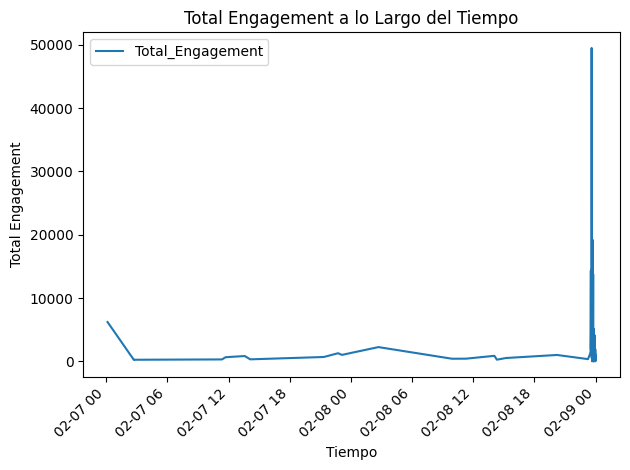

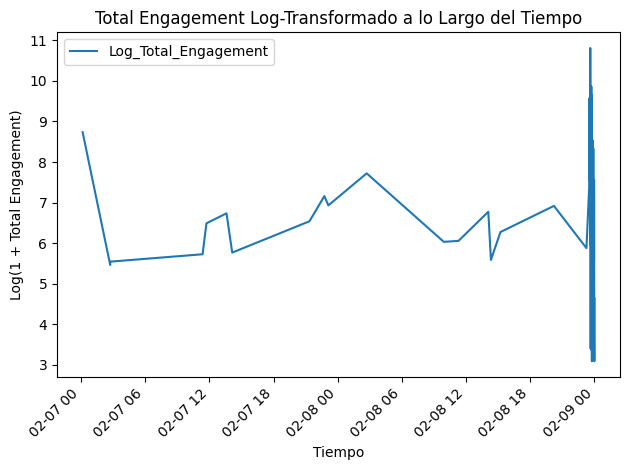

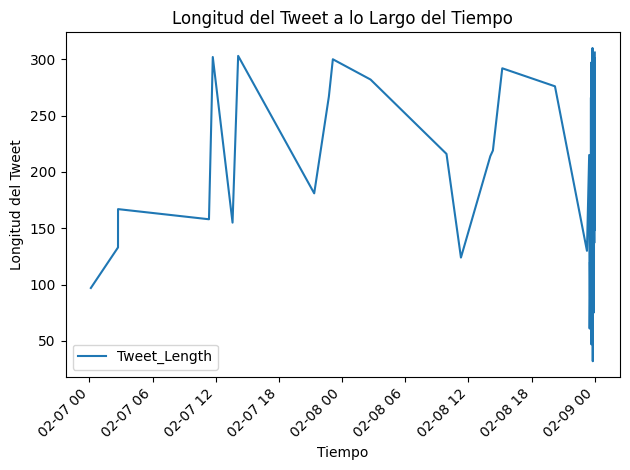

In [7]:
# -------------------------------------------
# SECCIÓN B: TENDENCIAS TEMPORALES
# -------------------------------------------

# Gráfico de línea: Total Engagement a lo largo del tiempo (valores brutos)
df_selected.sort_values("Timestamp_UTC").plot(
    x="Timestamp_UTC", y="Total_Engagement", kind="line",
    title="Total Engagement a lo Largo del Tiempo"
)
plt.xlabel("Tiempo")
plt.ylabel("Total Engagement")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de línea: Total Engagement log-transformado a lo largo del tiempo
df_selected["Log_Total_Engagement"] = np.log1p(df_selected["Total_Engagement"])  # log(1 + x)
df_selected.sort_values("Timestamp_UTC").plot(
    x="Timestamp_UTC", y="Log_Total_Engagement", kind="line",
    title="Total Engagement Log-Transformado a lo Largo del Tiempo"
)
plt.xlabel("Tiempo")
plt.ylabel("Log(1 + Total Engagement)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Gráfico de línea: Longitud del Tweet a lo largo del tiempo
df_selected.sort_values("Timestamp_UTC").plot(
    x="Timestamp_UTC", y="Tweet_Length", kind="line",
    title="Longitud del Tweet a lo Largo del Tiempo"
)
plt.xlabel("Tiempo")
plt.ylabel("Longitud del Tweet")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 📈 **Tendencias Temporales**

#### 🔹 **Total Engagement a lo Largo del Tiempo (Bruto)**
- La línea de tiempo del engagement revela un **pico dramático el 9 de febrero**, correspondiente al **aviso de terremoto/tsunami** — una señal clara de **alta atención pública**.
- Una publicación alcanza casi **50,000 interacciones**, lo que indica un **aviso viral o una actualización crítica** durante el evento.
- Fuera de este pico, el engagement es generalmente moderado, con **algunos picos menores ocasionales**.

#### 🔹 **Total Engagement a lo Largo del Tiempo (Transformación Logarítmica)**
- La transformación logarítmica suaviza la escala, ofreciendo una vista más clara de **patrones de engagement consistentes** más allá del pico del 9 de febrero.
- El pico del 9 de febrero sigue destacando como una anomalía clara, pero el resto de la actividad se vuelve más visible, mostrando un **ritmo base** de engagement informativo.
- Este formato permite detectar **cambios de tendencia** sin que un momento viral eclipse el panorama general.

#### 🔹 **Longitud de Tweets a lo Largo del Tiempo**
- Alrededor del 9 de febrero, se observa un **conjunto notable de tweets largos**, muchos alcanzando el **límite de caracteres (280–310)**.
- Esto sugiere que tanto usuarios como agencias compartieron **actualizaciones detalladas o avisos de emergencia** durante ese periodo crítico.
- También hay tweets más cortos entremezclados, probablemente utilizados como **alertas breves o seguimientos**.

---

#### ✅ **Análisis**
> El 9 de febrero destaca como el **epicentro del engagement público**, activado por el aviso de terremoto/tsunami. Los picos virales, la longitud de los tweets y la actividad elevada se alinean con la línea de tiempo del evento. El **engagement transformado logarítmicamente** ayuda a contextualizar este momento dentro del patrón general de comunicación, ofreciendo una visión sobre cómo evolucionaron la urgencia y el formato del mensaje en tiempo real.

### 🟦 SECCIÓN C: Comparaciones Basadas en el Idioma

Comparamos el comportamiento de los tweets según el idioma:

- **Gráfico de Conteo**: Muestra cuántos tweets se publicaron en cada idioma.
- **Gráfico de Barras**: Compara los niveles promedio de engagement por idioma.
- **Gráfico de Dispersión (Strip Plot)**: Revela la distribución y variabilidad del engagement en cada idioma.

En conjunto, estos gráficos permiten identificar qué comunidades lingüísticas fueron más activas y generaron mayor interacción.

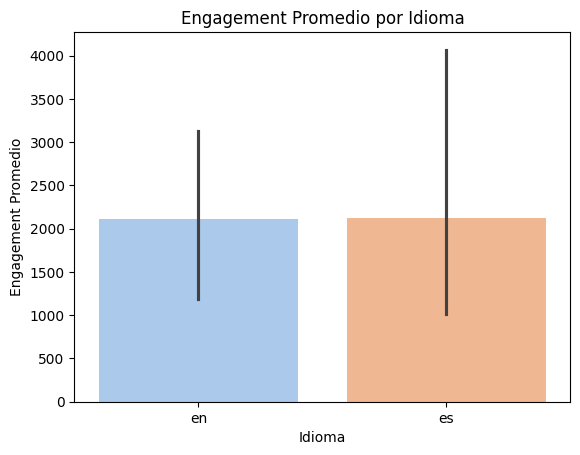

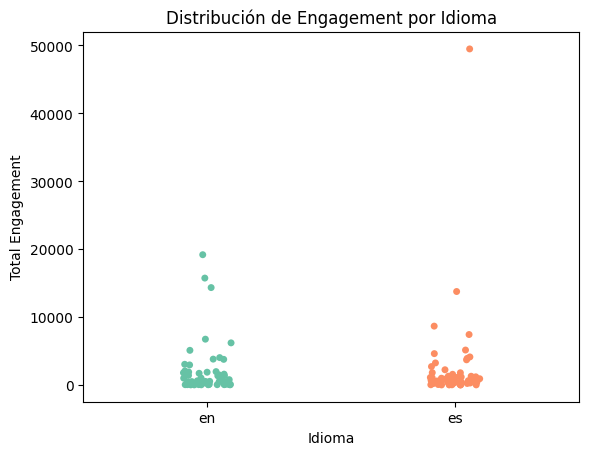

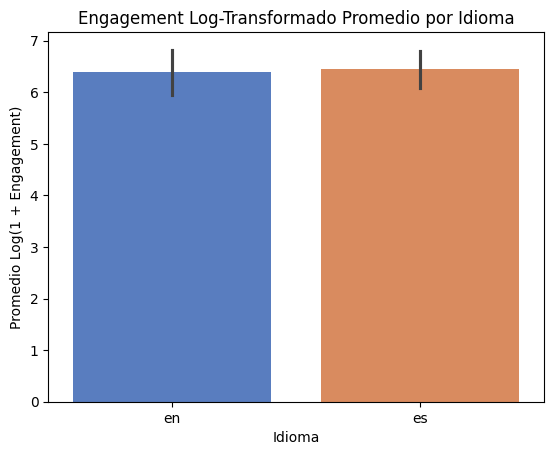

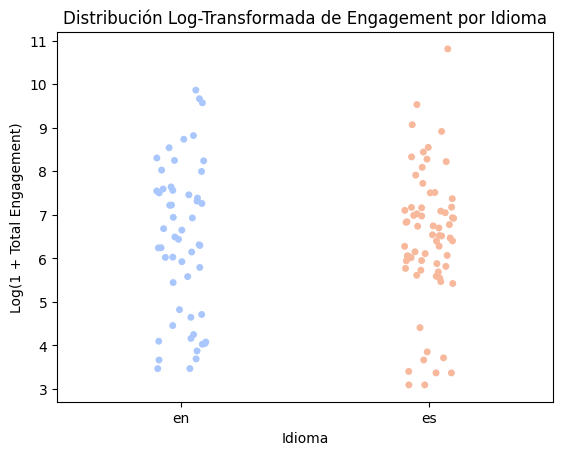

In [8]:
# -------------------------------------------
# SECCIÓN C: COMPARACIONES BASADAS EN IDIOMA
# -------------------------------------------

# Gráfico de barras (Seaborn): Promedio de Total Engagement por idioma
if "Language" in df_selected.columns:
    sns.barplot(x="Language", y="Total_Engagement", data=df_selected, hue="Language", palette="pastel", legend=False)
    plt.title("Engagement Promedio por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Engagement Promedio")
    plt.show()

# Gráfico tipo strip: Distribución bruta de engagement por idioma
if "Language" in df_selected.columns:
    sns.stripplot(x="Language", y="Total_Engagement", data=df_selected, hue="Language", palette="Set2", jitter=True, legend=False)
    plt.title("Distribución de Engagement por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Total Engagement")
    plt.show()

# -------------------------------------------
# NUEVO: Engagement Log-Transformado por Idioma
# -------------------------------------------

# Asegurarse de que la columna log-transformada existe
df_selected["Log_Total_Engagement"] = np.log1p(df_selected["Total_Engagement"])

# Gráfico de barras: Promedio de engagement log-transformado por idioma
if "Language" in df_selected.columns:
    sns.barplot(x="Language", y="Log_Total_Engagement", data=df_selected, hue="Language", palette="muted", legend=False)
    plt.title("Engagement Log-Transformado Promedio por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Promedio Log(1 + Engagement)")
    plt.show()

# Gráfico tipo strip: Distribución log-transformada del engagement por idioma
if "Language" in df_selected.columns:
    sns.stripplot(x="Language", y="Log_Total_Engagement", data=df_selected, hue="Language", palette="coolwarm", jitter=True, legend=False)
    plt.title("Distribución Log-Transformada de Engagement por Idioma")
    plt.xlabel("Idioma")
    plt.ylabel("Log(1 + Total Engagement)")
    plt.show()


### 🌐 **Tendencias de Engagement por Idioma**

#### 🔹 **Engagement Promedio por Idioma (Bruto)**
- Los tweets en **inglés (`en`) y español (`es`) muestran un engagement promedio casi idéntico**, ambos ligeramente por encima de 2,000.
- Las **barras de error** son amplias, lo que indica una gran variabilidad — especialmente en los tweets en español, lo que sugiere tanto picos como mínimos extremos.
- Esto implica que, aunque la visibilidad promedio es similar, **los tweets en español pueden tener tanto casos de muy bajo como de altísimo engagement**.

#### 🔹 **Distribución de Engagement por Idioma (Bruto)**
- El **gráfico de dispersión revela varios outliers extremos** — un tweet en español con casi **50,000 interacciones** destaca claramente.
- Los tweets en inglés también muestran algunos en el rango de 10k–20k, pero son menos extremos y menos frecuentes.
- En general, **los tweets en español tienen una dispersión más amplia**, lo que indica un engagement menos consistente y más polarizado en comparación con el inglés.

#### 🔹 **Engagement Promedio por Idioma (Escala Logarítmica)**
- Tras aplicar una escala logarítmica, ambos idiomas **convergen en términos de engagement promedio**, con barras casi idénticas alrededor de `log(1 + 6400) ≈ 6.4`.
- La **transformación logarítmica atenúa los outliers**, permitiendo enfocarse en las tendencias generales más que en las anomalías virales.
- Esto sugiere que los niveles de engagement diarios son **consistente y comparables entre idiomas**, a pesar de las diferencias en escala bruta.

#### 🔹 **Distribución de Engagement Transformado por Idioma**
- La mayoría de los tweets en ambos idiomas **se agrupan entre los valores logarítmicos de 5 a 7**, lo que equivale a un engagement de aproximadamente ~150 a ~1,000.
- Los tweets en español nuevamente muestran mayor variabilidad en los valores altos, con **varios superando log 9 (más de 8,000 interacciones)**.
- El gráfico muestra que **el idioma no es un factor determinante fuerte del engagement**, aunque los **tweets en español presentan más potencial de viralidad**.

---

### ✅ **Análisis**
> Las métricas brutas muestran que los tweets en español tienen extremos más altos, mientras que los tweets en inglés están más uniformemente distribuidos. Una vez transformados logarítmicamente, ambos idiomas revelan un engagement promedio casi idéntico, lo que sugiere que **el alcance y la interacción del mensaje fueron igualmente efectivos en ambos grupos lingüísticos**, aunque los tweets en español muestran mayor potencial viral.

### 🟦 SECCIÓN D: Relación entre características

Usamos un **scatter plot** y **gráfico de barras** para probar si hay relación entre:

- **Tweet_Length** (eje x)
- **Compromiso_total** (eje y)

Ayuda a responder: *¿Los tweets más largos tienden a recibir más atención?*

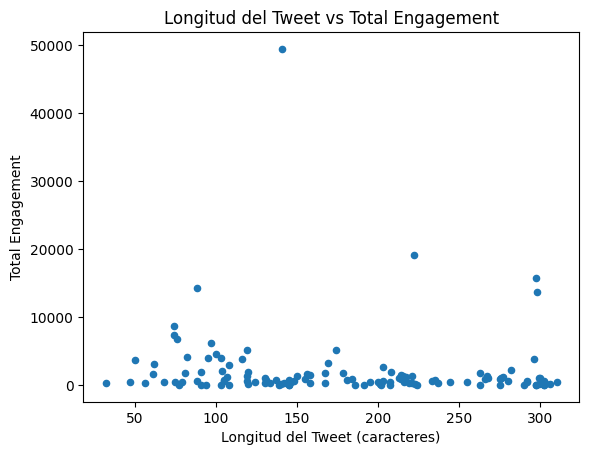

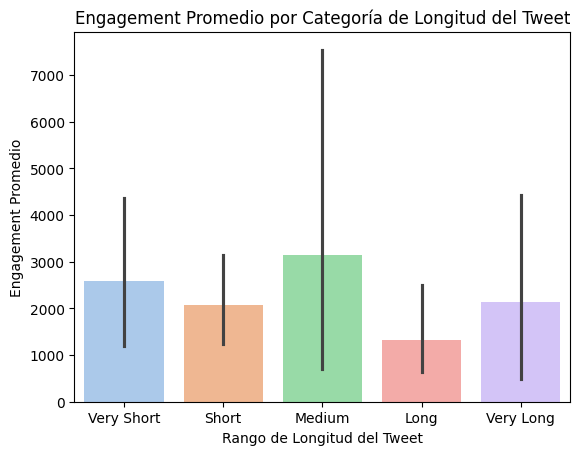

In [9]:
# -------------------------------------------
# SECCIÓN D: RELACIÓN ENTRE CARACTERÍSTICAS
# -------------------------------------------

# Gráfico de dispersión: Longitud del Tweet vs. Total Engagement
df_selected.plot(kind="scatter", x="Tweet_Length", y="Total_Engagement", title="Longitud del Tweet vs Total Engagement")
plt.xlabel("Longitud del Tweet (caracteres)")
plt.ylabel("Total Engagement")
plt.show()

# Gráfico de barras: Promedio de Engagement por Categoría de Longitud del Tweet
sns.barplot(x="Tweet_Length_Category", y="Total_Engagement", hue="Tweet_Length_Category", data=df_selected, palette="pastel", legend=False)
plt.title("Engagement Promedio por Categoría de Longitud del Tweet")
plt.xlabel("Rango de Longitud del Tweet")
plt.ylabel("Engagement Promedio")
plt.show()

### ✍️ **Relación Entre la Longitud del Tweet y el Engagement**

#### 🔹 **Longitud del Tweet vs. Total Engagement (Gráfico de Dispersión)**
- El gráfico de dispersión muestra que **la mayoría de los tweets se agrupan en niveles bajos de engagement**, independientemente de su longitud.
- Sin embargo, hay algunos **outliers con alto engagement** — especialmente un tweet de aproximadamente **140 caracteres** que alcanzó **casi 50,000 interacciones**.
- Se observan picos adicionales en el rango de 100 a 250 caracteres, lo que sugiere que los **tweets de longitud concisa a moderada** podrían ser óptimos para ganar tracción durante eventos urgentes.
- No existe una relación lineal estricta, pero la dispersión indica que el **engagement no está limitado a tweets muy largos o muy cortos**.

#### 🔹 **Engagement Promedio por Categoría de Longitud de Tweet (Gráfico de Barras)**
- Los tweets se agrupan en categorías como *Muy Corto*, *Corto*, *Medio*, *Largo* y *Muy Largo*.
- Los **tweets de longitud media** (probablemente entre 100 y 160 caracteres) muestran el **engagement promedio más alto**, aunque las barras de error son amplias, reflejando variabilidad.
- Los tweets **Muy Cortos** y **Muy Largos** también tienen un desempeño razonable, posiblemente por ser **alertas rápidas** o **avisos detallados**.
- Los **tweets largos (cerca del límite de caracteres)** tienen el engagement promedio más bajo, posiblemente debido a menor claridad o legibilidad durante momentos de alta urgencia.

---

### ✅ **Análisis**
> El engagement tiende a alcanzar su punto máximo en **tweets de longitud media**, lo que puede representar un buen equilibrio entre ser **conciso e informativo**. Los tweets extremadamente cortos o largos también pueden funcionar bien según el contexto — como **alertas breves** o **avisos detallados**. Sin embargo, **la longitud del tweet por sí sola no predice consistentemente el engagement**; la claridad del contenido y el momento de publicación probablemente juegan un papel más importante.

### 🟦 SECCIÓN E: Matriz de correlación

Este mapa de calor muestra el **coeficiente de correlación** entre:

- `Total_Engagement`
- `Tweet_Length`

Los valores de correlación oscilan entre:
- **+1** = fuertemente positivo
- **0** = sin correlación
- **-1** = fuertemente negativo

Esto confirma o cuestiona lo que vimos en el gráfico de dispersión.

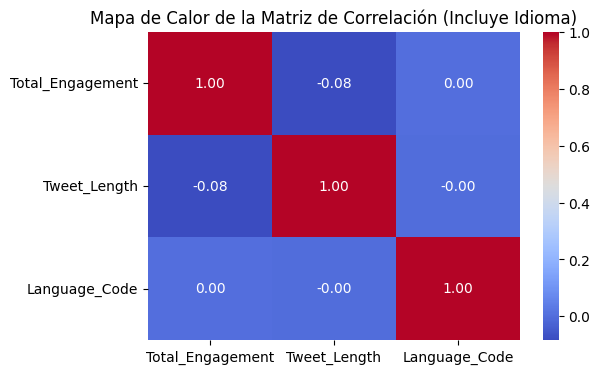

In [10]:
# -------------------------------------------
# SECCIÓN E: MATRIZ DE CORRELACIÓN
# -------------------------------------------

# Mapa de calor: Correlación entre variables numéricas

# Convertir idioma a códigos numéricos para incluir en la correlación
df_selected["Language_Code"] = df_selected["Language"].map({"en": 0, "es": 1})

# Matriz de correlación incluyendo el código del idioma
corr_matrix = df_selected[["Total_Engagement", "Tweet_Length", "Language_Code"]].corr()

# Mapa de calor de la matriz de correlación
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Mapa de Calor de la Matriz de Correlación (Incluye Idioma)")
plt.show()


### 🔗 **Análisis de la Matriz de Correlación**

Esta matriz explora las relaciones entre:
- **Total Engagement**
- **Longitud del Tweet**
- **Código de Idioma** (`en` = 0, `es` = 1)

#### 🔹 **Total Engagement vs. Longitud del Tweet**
- Correlación: **-0.08**
- Se trata de una **correlación negativa muy débil**, lo que sugiere que a medida que aumenta la longitud del tweet, el engagement total **disminuye ligeramente**, aunque la relación no es estadísticamente significativa.
- En términos prácticos, la longitud del tweet **no influye de manera importante** en el nivel de engagement.

#### 🔹 **Total Engagement vs. Idioma**
- Correlación: **0.00**
- No existe correlación entre el idioma y el engagement total.
- Esto confirma hallazgos previos: **los tweets en inglés y en español tienen un rendimiento similar en promedio**, y el idioma por sí solo **no impulsa el engagement**.

#### 🔹 **Longitud del Tweet vs. Idioma**
- Correlación: **~0.00**
- Nuevamente, no hay relación significativa. Los tweets en inglés y en español son **similares en longitud**, sin una tendencia clara hacia formatos más largos o más cortos según el idioma.

---

### ✅ **Análisis**
> El heatmap de correlación revela que **ninguna de las variables analizadas (longitud o idioma)** tiene una influencia directa significativa sobre el engagement de los tweets. Esto respalda los hallazgos anteriores de que **el contexto, el momento de publicación y el contenido** son factores mucho más determinantes en la respuesta del público que atributos estructurales como la longitud o el idioma.

### 🟦 SECCIÓN F: Visualizaciones Interactivas con Plotly

Esta sección recrea visualizaciones clave utilizando **Plotly** para ofrecer mayor interactividad y profundidad de análisis. Estos gráficos permiten:

- 🔍 **Hacer zoom y desplazarse** para inspeccionar picos de engagement a lo largo del tiempo  
- 🖱️ **Ver tooltips al pasar el cursor** para explorar datos con precisión  
- 📊 **Comparaciones lado a lado** entre el engagement bruto y el transformado (log)
- 💡 Útil para presentaciones, paneles interactivos y análisis detallado del comportamiento de engagement

In [11]:
# -------------------------------------------
# SECCIÓN F: VISUALIZACIONES INTERACTIVAS CON PLOTLY
# -------------------------------------------

import plotly.express as px
import plotly.graph_objects as go

# Gráfico de línea interactivo: Total Engagement a lo largo del tiempo
fig = px.line(
    df_selected.sort_values("Timestamp_UTC"),
    x="Timestamp_UTC",
    y="Total_Engagement",
    title="🕒 Total Engagement a lo Largo del Tiempo (Interactivo)",
    labels={"Timestamp_UTC": "Tiempo", "Total_Engagement": "Total Engagement"}
)
fig.update_layout(xaxis_title="Tiempo", yaxis_title="Total Engagement")
fig.show()

# Gráfico de línea interactivo: Total Engagement log-transformado a lo largo del tiempo
fig = px.line(
    df_selected.sort_values("Timestamp_UTC"),
    x="Timestamp_UTC",
    y="Log_Total_Engagement",
    title="🕒 Total Engagement Log-Transformado a lo Largo del Tiempo (Interactivo)",
    labels={"Timestamp_UTC": "Tiempo", "Log_Total_Engagement": "Log(1 + Engagement)"}
)
fig.update_layout(xaxis_title="Tiempo", yaxis_title="Log(1 + Total Engagement)")
fig.show()

# Histograma interactivo: Distribución de Total Engagement
fig = px.histogram(
    df_selected,
    x="Total_Engagement",
    nbins=30,
    title="📊 Distribución de Total Engagement (Interactivo)",
    labels={"Total_Engagement": "Total Engagement"},
)
fig.update_layout(yaxis_title="Cantidad de Tweets")
fig.show()

# Histograma interactivo: Distribución de Total Engagement log-transformado
fig = px.histogram(
    df_selected,
    x="Log_Total_Engagement",
    nbins=30,
    title="📊 Distribución Log-Transformada de Total Engagement (Interactivo)",
    labels={"Log_Total_Engagement": "Log(1 + Engagement)"},
)
fig.update_layout(yaxis_title="Cantidad de Tweets")
fig.show()

## ☁️ Nube de Palabras: Términos Frecuentes en Tweets

Esta Nube de Palabras muestra las **palabras más comunes** en todos los tweets.

- Las **palabras más grandes** = mayor frecuencia de uso.  
- Útil para identificar **temas en tendencia** o términos clave.  
- Se eliminaron las **stopwords** comunes (en inglés y español) y el ruido típico de Twitter (como `RT`, `https`) para mayor claridad.

> Un resumen visual rápido del contenido de los tweets en ambos idiomas.

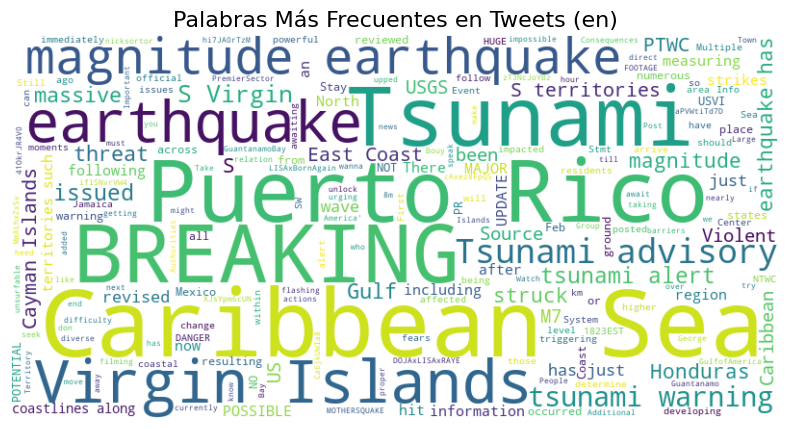

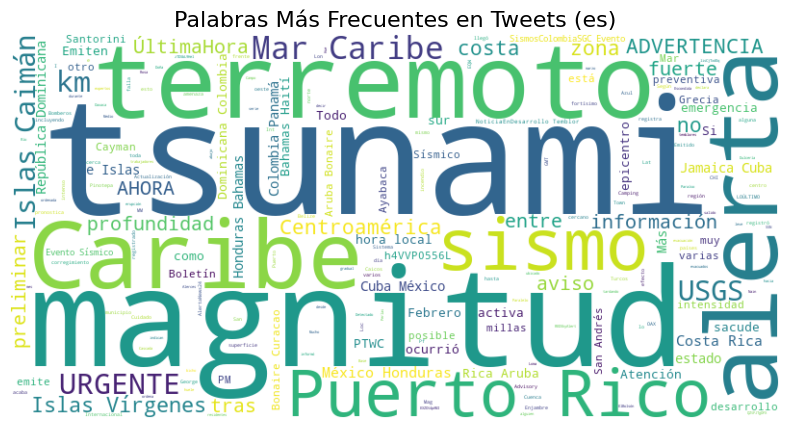

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Definir conjunto reutilizable de stopwords (palabras vacías)
custom_stopwords = {
    "https", "RT", "co", "amp",
    "de", "a", "t", "el", "que", "se", "la", "en", "por",
    "los", "las", "del", "al", "un", "una", "con", "para",
    "este", "esta", "estos", "estas", "ese", "esa", "esos", "esas",
    "y", "o", "u", "pero", "su", "sus", "porque", "son",
    "ser", "sido", "ha", "han", "hay", "qué", "etc", "PuertoRico",
    "the", "is", "to", "of", "and", "in", "for", "on", "at", "with", "as", "this", "that", "it", "are",
}

# Función para generar y mostrar una nube de palabras según el idioma
def generate_wordcloud_for_language(language_code):
    text = " ".join(
        df_selected[df_selected["Language"] == language_code]["Tweet_Content"].dropna().astype(str)
    )
    wordcloud = WordCloud(
        width=800,
        height=400,
        background_color='white',
        colormap='viridis',
        max_words=200,
        stopwords=custom_stopwords
    ).generate(text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Palabras Más Frecuentes en Tweets ({language_code})", fontsize=16)
    plt.show()

# Generar nubes de palabras para inglés y español
generate_wordcloud_for_language("en")
generate_wordcloud_for_language("es")


### 🌐 **Términos Principales en Tweets por Idioma**

#### 🔹 **Nube de Palabras en Inglés (`en`)**
- **Términos más destacados**:  
  `BREAKING`, `Tsunami`, `Caribbean Sea`, `Puerto Rico`, `Virgin Islands`, `earthquake`, `magnitude`
- El lenguaje refleja un tono de **urgencia y estilo noticioso**, con énfasis en:
  - **Enfoque geográfico**: `Caribbean`, `Puerto Rico`, `Virgin Islands`, `Cayman Islands`, etc.
  - **Términos relacionados con el evento**: `Tsunami`, `earthquake`, `warning`, `advisory`, `USGS`
  - **Enmarcado comunicacional**: Palabras como `BREAKING`, `UPDATE` y `POTENTIAL` sugieren un formato de **alerta noticiosa o actualización en tiempo real**.
- Esto sugiere que los tweets en inglés se utilizaron principalmente para **noticias de última hora, alertas y comunicados oficiales**, probablemente dirigidos tanto a audiencias internacionales como regionales.

#### 🔹 **Nube de Palabras en Español (`es`)**
- **Términos más destacados**:  
  `tsunami`, `terremoto`, `magnitud`, `alerta`, `Puerto Rico`, `Caribe`, `sismo`, `URGENTE`
- El tono dominante es de **emergencia y precisión**, con:
  - Fuerte enfoque **científico/informativo**: `magnitud`, `USGS`, `profundidad`, `km`, `preliminar`
  - Lenguaje orientado a **alertas**: `alerta`, `URGENTE`, `advertencia`, `aviso`
  - Términos geográficos comunes en la región, como `Islas Caimán`, `Centroamérica`, `Costa Rica`, etc.
- Los tweets en español parecen centrarse en **datos sísmicos detallados y alertas de seguridad pública**, dirigidos a usuarios regionales en busca de actualizaciones urgentes y locales.

---

### ✅ **Análisis**
> Aunque tanto los tweets en inglés como en español giran en torno a la **emergencia por terremoto y tsunami**, sus vocabularios reflejan distintos estilos de comunicación. Los tweets en inglés tienden a destacar la **noticiabilidad y la urgencia**, mientras que los tweets en español enfatizan la **información técnica y las alertas localizadas**. En conjunto, muestran un flujo bilingüe de comunicación pública durante el evento sísmico del 9 de febrero.

## Conclusión

Este análisis proporcionó una visión integral del conjunto de datos `PR_Advisory_Tweets_Feb_2025.csv`, enfocado en el engagement de los tweets, las características del contenido y los patrones lingüísticos. A través de una limpieza de datos sistemática, la creación de nuevas variables y una variedad de técnicas de exploración visual, se obtuvieron insights sobre:

- La distribución y estructura del contenido de los tweets  
- Tendencias temporales en la actividad y el engagement  
- Diferencias de engagement según el idioma  
- Temas comunes expresados por los usuarios a través de la frecuencia de palabras  

Se utilizaron diversas herramientas de visualización—tanto estáticas como interactivas—para mejorar la interpretación y descubrir patrones en los datos. Este enfoque demuestra cómo el ecosistema de ciencia de datos en Python puede aplicarse de forma eficaz al análisis de redes sociales, especialmente en el contexto de eventos en tiempo real como desastres naturales.